In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import re

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

# Using Spacy

In [15]:
! pip install -U pip setuptools wheel
! pip install -U spacy
! python -m spacy download en_core_web_sm

  Using cached spacy-3.8.4-cp310-cp310-macosx_11_0_arm64.whl.metadata (27 kB)
  Using cached thinc-8.3.4-cp310-cp310-macosx_11_0_arm64.whl.metadata (15 kB)
  Using cached blis-1.2.0-cp310-cp310-macosx_11_0_arm64.whl.metadata (7.7 kB)
Using cached spacy-3.8.4-cp310-cp310-macosx_11_0_arm64.whl (6.3 MB)
Using cached thinc-8.3.4-cp310-cp310-macosx_11_0_arm64.whl (779 kB)
Using cached blis-1.2.0-cp310-cp310-macosx_11_0_arm64.whl (1.3 MB)
  Attempting uninstall: blis
    Found existing installation: blis 0.7.11
    Uninstalling blis-0.7.11:
      Successfully uninstalled blis-0.7.11
  Attempting uninstall: thinc
    Found existing installation: thinc 8.2.5
error: uninstall-no-record-file

× Cannot uninstall thinc 8.2.5
╰─> The package's contents are unknown: no RECORD file was found for thinc.

hint: You might be able to recover from this via: pip install --force-reinstall --no-deps thinc==8.2.5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 37.6 MB/s eta 0:00:00 0:00:01
✔ Downlo

In [16]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [3]:
# load headache notes
# from google.colab import files
file_path = "./notes_headache.txt"
# uploaded = files.upload()

In [18]:
notes = []
with open('notes_headache.txt', 'r') as fin:
  lines = fin.readlines()
  for line in lines:
    notes.append(line)
print(notes)
print(len(notes))

['50 year old female presents after having fallen in the bathtub 4 days ago and hitting the back of her head. Since then she has had a massive headache" which did not resolve with Tylenol. She states that she has a high threshold for pain and did not realize how bad it was during the day while at work but then when she got home at night she noticed it. The patient noticed ""silvery spects"" in her vision and she had trouble with some simple tasks like finding the tags on the back of her clothing in the morning. She reported that she had to check several times to make sure she did not put her clothes on backwards. She has had some dizziness, but no nausea or vomiting. Her speech has not been affected.\n', '23 F with h/o Lupus, ESRD not on HD (planned PD), labile hypertension, RUE VTE on anticoagulation, recent facial swelling who presents with hypertensive emergency. Patient developed severe frontal HA last evenening, a/w nausea. BP was not [**Location (un) 1131**] on home BP cuff. In t

In [1]:
df=notes
notes.head()

NameError: name 'notes' is not defined

In [58]:
# Build corpus of all the entities extracted from the notes using spaCy model.
# The corpus is an array of arrays or list of lists where each of the nested lists corresponds to a note.
corpus=[]
for row in range(0, len(df)):
  str_tokens=[]
  tokens= nlp(df[row]).ents
  for i in range(0, len(tokens)):
    str_tokens.append(tokens[i].text)
  corpus.append(list(str_tokens))


print(corpus)

[['year', 'female', 'fallen', 'bathtub 4 days', 'head', 'massive headache', 'Tylenol', 'states', 'threshold', 'pain', 'day', 'home', 'night', 'patient', 'silvery spects', 'vision', 'finding', 'tags', 'clothing', 'morning', 'clothes', 'backwards', 'dizziness', 'vomiting', 'speech', 'affected'], ['F', 'h/o Lupus', 'ESRD', 'HD', 'planned PD', 'labile hypertension', 'RUE', 'anticoagulation', 'facial swelling', 'hypertensive emergency', 'Patient', 'frontal HA', 'a/w nausea', 'BP', 'Location', 'home BP', 'cuff', 'AM', 'HA', 'vomiting yellow/green liquid', 'BP', 'cuff', 'BP', 'Patient', 'VNA', 'Friday', 'BP', 'Patient', 'CP', 'shortness of breath', 'abd pain', 'facial swelling', 'weakness', 'dizziness', 'difficulty', 'speach', 'no numbness', 'tingling', 'compliant', 'medications', 'GU/GI complaints', 'UA', 'ED'], ['RH M', 'HTN', 'Afib', 'coumadin', 'CAD', 'PTCA', 'USOH', 'mild right-sided headache', 'a/w', 'photophobia', 'nausea', 'sitting', 'computer half', 'hour', 'L foot', 'numb', 'wobbly'

The vectors generated by Word2Vec, as implemented by the Gensim library, are specific to the corpus used for training. Word2Vec learns word embeddings by analyzing the patterns of word co-occurrence within the given training corpus. As a result, the learned word vectors capture the semantics and relationships of words as they appear in that particular corpus.

In other words, the word embeddings produced by Word2Vec are not universal but are context-dependent. They represent how words are related to each other within the specific textual data provided during training. Therefore, if you train a Word2Vec model on one corpus and then train another model on a different corpus, the word vectors learned by each model may differ because they reflect the linguistic patterns and context of their respective training data.

To create word vectors that are more general and applicable across different contexts, larger and more diverse training corpora are often used. Pretrained Word2Vec models, such as those trained on massive text datasets like Wikipedia or news articles, offer word vectors that are more general and can be used as a starting point for various natural language processing tasks. These pretrained embeddings capture a broad range of linguistic knowledge from diverse sources, making them useful in many applications.

In summary, Word2Vec word vectors are specific to the training corpus but can be made more universal by training on larger and more diverse datasets or by using pretrained embeddings.

In [ ]:
from gensim.models import Word2Vec
model1 = Word2Vec(corpus, min_count=1)

In [40]:
model1.wv['Tylenol']

array([-0.00476641,  0.00692343, -0.00710998, -0.00609479, -0.00504983,
        0.00634687, -0.00375642,  0.00790653,  0.00713383,  0.00770472,
        0.00191398,  0.00369026, -0.0003584 ,  0.00401229, -0.00643448,
        0.009891  , -0.00328591, -0.00947344,  0.00195278,  0.00682648,
        0.00103246,  0.00239429,  0.00943715,  0.00900247, -0.00464862,
        0.00830051,  0.00231604, -0.0082516 ,  0.00046795,  0.0019711 ,
        0.00883136, -0.00112187, -0.00681867, -0.00446385, -0.00760596,
       -0.00647371, -0.00110152, -0.00826262,  0.00940345, -0.00796621,
        0.00266245, -0.00055814, -0.00274415, -0.00538625, -0.00769939,
       -0.00626897,  0.00953656,  0.00507596,  0.00260511, -0.00929036,
       -0.00741965,  0.00881642, -0.00089472, -0.00447601,  0.00216447,
       -0.0097026 , -0.00174986, -0.00657175, -0.00445743,  0.00140168,
        0.00433023,  0.00559497, -0.00283657, -0.00071711,  0.00743247,
        0.00442774,  0.00146062,  0.00870868,  0.00721435,  0.00

In [41]:
model1.wv.similar_by_word('Tylenol') #please read the below note for explaination of following output

[('headache', 0.2656380534172058),
 ('mother', 0.24404218792915344),
 ('RV enlargement', 0.22950485348701477),
 ('MCA', 0.21128234267234802),
 ('PCP', 0.20350155234336853),
 ('tags', 0.19914409518241882),
 ('morning', 0.19369108974933624),
 ('ventimask', 0.19273902475833893),
 ('sudden onset left sided HA', 0.19083376228809357),
 ('multiple seizures', 0.18888051807880402)]

The output shows words that are not semantically similar to "Tylenol." This can happen if the training data used to train the Word2Vec model does not contain enough context or examples of the word "Tylenol" and its related terms, or if the model's parameters (such as min_count) are not set appropriately.

In this case since Tylenol appears only once in the entire corpus, min_count has to be set to 1. (The model ignores all words that appear less than min_count times)

This comes at a cost, means that even very infrequent words are included in the vocabulary. This can lead to noisy word embeddings for rare words.

In [43]:
def tsne_plot(model,words, preTrained=False):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in words:
      if preTrained:
          tokens.append(model[word])
      else:
          tokens.append(model.wv[word])
      labels.append(word)

    tokens = np.array(tokens)
    tsne_model = TSNE(perplexity=30, early_exaggeration=12, n_components=2, init='pca', n_iter=1000, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/Users/jefdewitt/miniconda3/envs/new_env/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


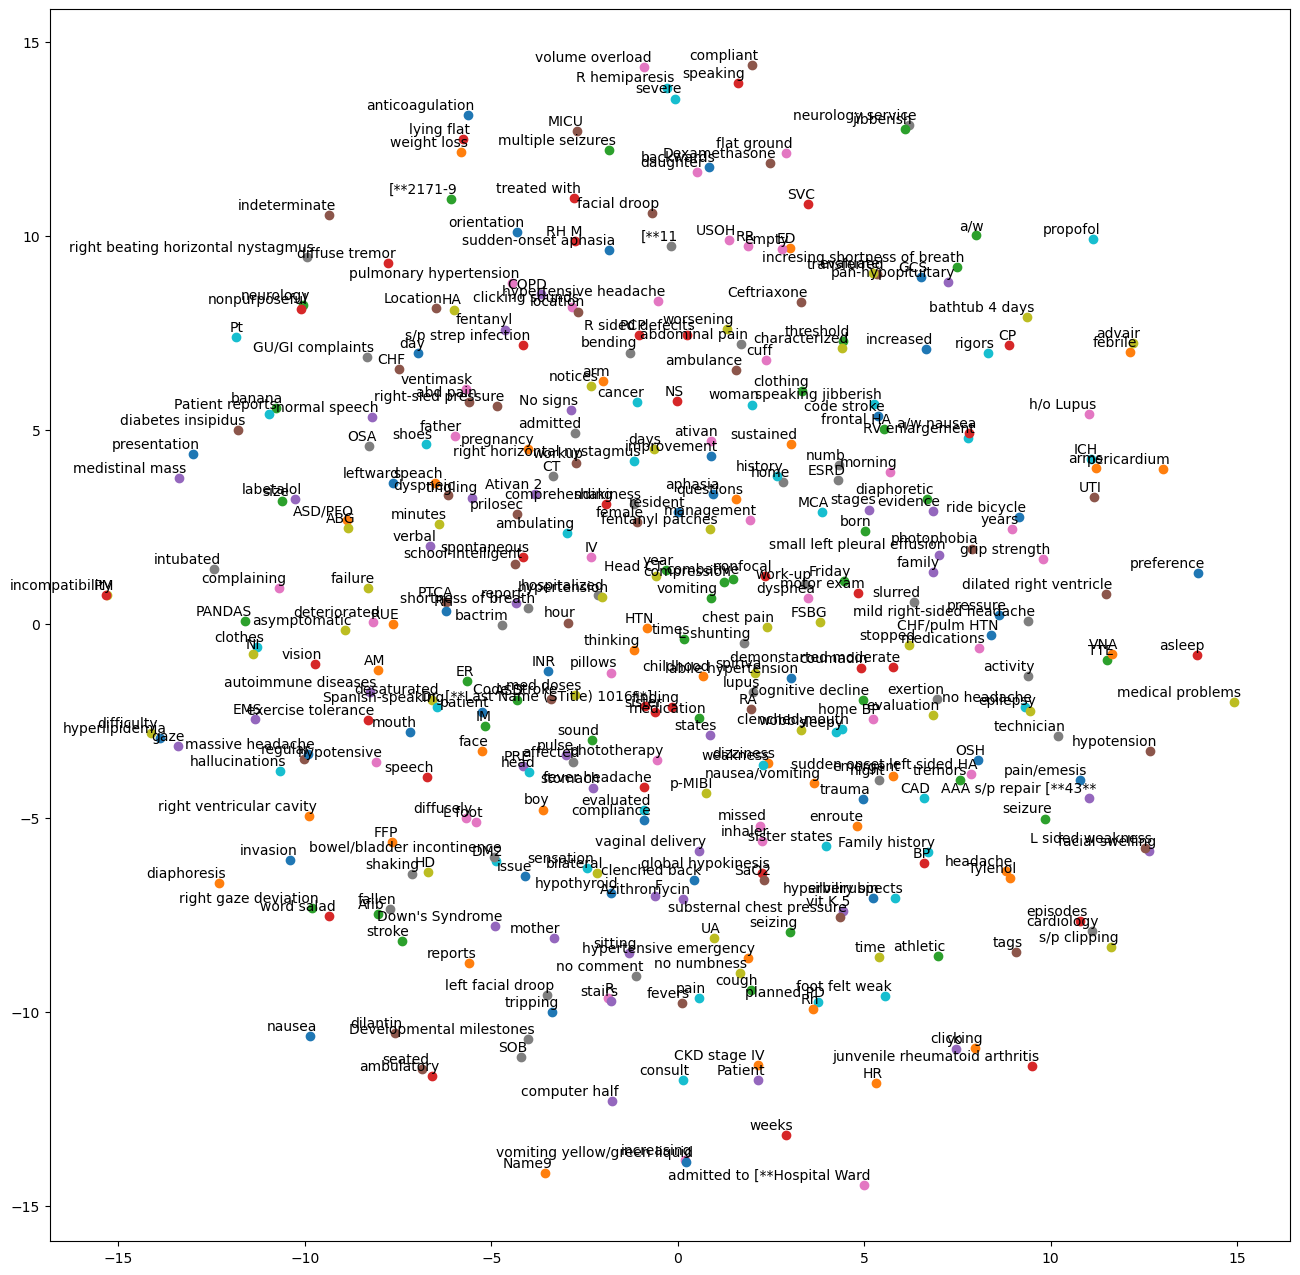

In [44]:
vocabs = model1.wv.key_to_index.keys()
new_v = np.array(list(vocabs))
tsne_plot(model1,new_v)

In [45]:
# load pre-trained word2vec embeddings
import gensim
import gensim.downloader as api

info = api.info()  # show info about available models/datasets
pretrained_model= api.load("glove-wiki-gigaword-50")  # download the model and return as object ready for use


# pretrained_model = gensim.models.KeyedVectors.load_word2vec_format('PubMed-and-PMC-ri.tar.gz', binary=True)

In [27]:
# queen = (king - man) + woman
result=pretrained_model.most_similar(positive=['woman','king'], negative=['man'], topn=1)
print(result)

[('queen', 0.8523604273796082)]


In [46]:
pretrained_model.most_similar("headache")

[('headaches', 0.8957464098930359),
 ('fatigue', 0.8547417521476746),
 ('pains', 0.8367806673049927),
 ('aches', 0.8088536262512207),
 ('nausea', 0.8022515177726746),
 ('discomfort', 0.7890003323554993),
 ('pain', 0.7766653895378113),
 ('anxiety', 0.7692657709121704),
 ('symptom', 0.7564830780029297),
 ('migraine', 0.7536172270774841)]

In [47]:
corpus_in_pretrained_model = []
for word in vocabs:
  if word in pretrained_model:
    corpus_in_pretrained_model.append(word)
  else:
    print(word) #

ED
BP
Patient
HTN
MICU
SOB
PM
right gaze deviation
treated with
EMS
RA
RR
abdominal pain
FSBG
Name9
PCP
PRE
CHF
facial swelling
Location
shortness of breath
CAD
pulmonary hypertension
Pt
HR
vit K 5
L sided weakness
left facial droop
Head CT
ICH
INR
FFP
IM
labetalol
sudden onset left sided HA
s/p clipping
RV enlargement
OSH
ASD
computer half
L foot
foot felt weak
R sided defecits
MCA
ASD/PFO
TTE
demonstarted moderate
dilated right ventricle
R
L shunting
p-MIBI
right ventricular cavity
global hypokinesis
right-sied pressure
[**11
ambulating
CHF/pulm HTN
exercise tolerance
dyspneic
flat ground
Dr. [**Last Name (STitle) 1016**]
admitted to [**Hospital Ward
ER
fever headache
F
h/o Lupus
ESRD
HD
planned PD
labile hypertension
RUE
pan-hypopituitary
Dexamethasone
bathtub 4 days
massive headache
Tylenol
Azithromycin
Ceftriaxone
ventimask
ABG
silvery spects
hypertensive emergency
a/w
RH M
GU/GI complaints
UA
R hemiparesis
speach
Afib
PTCA
USOH
mild right-sided headache
no numbness
Spanish-speaki

/Users/jefdewitt/miniconda3/envs/new_env/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


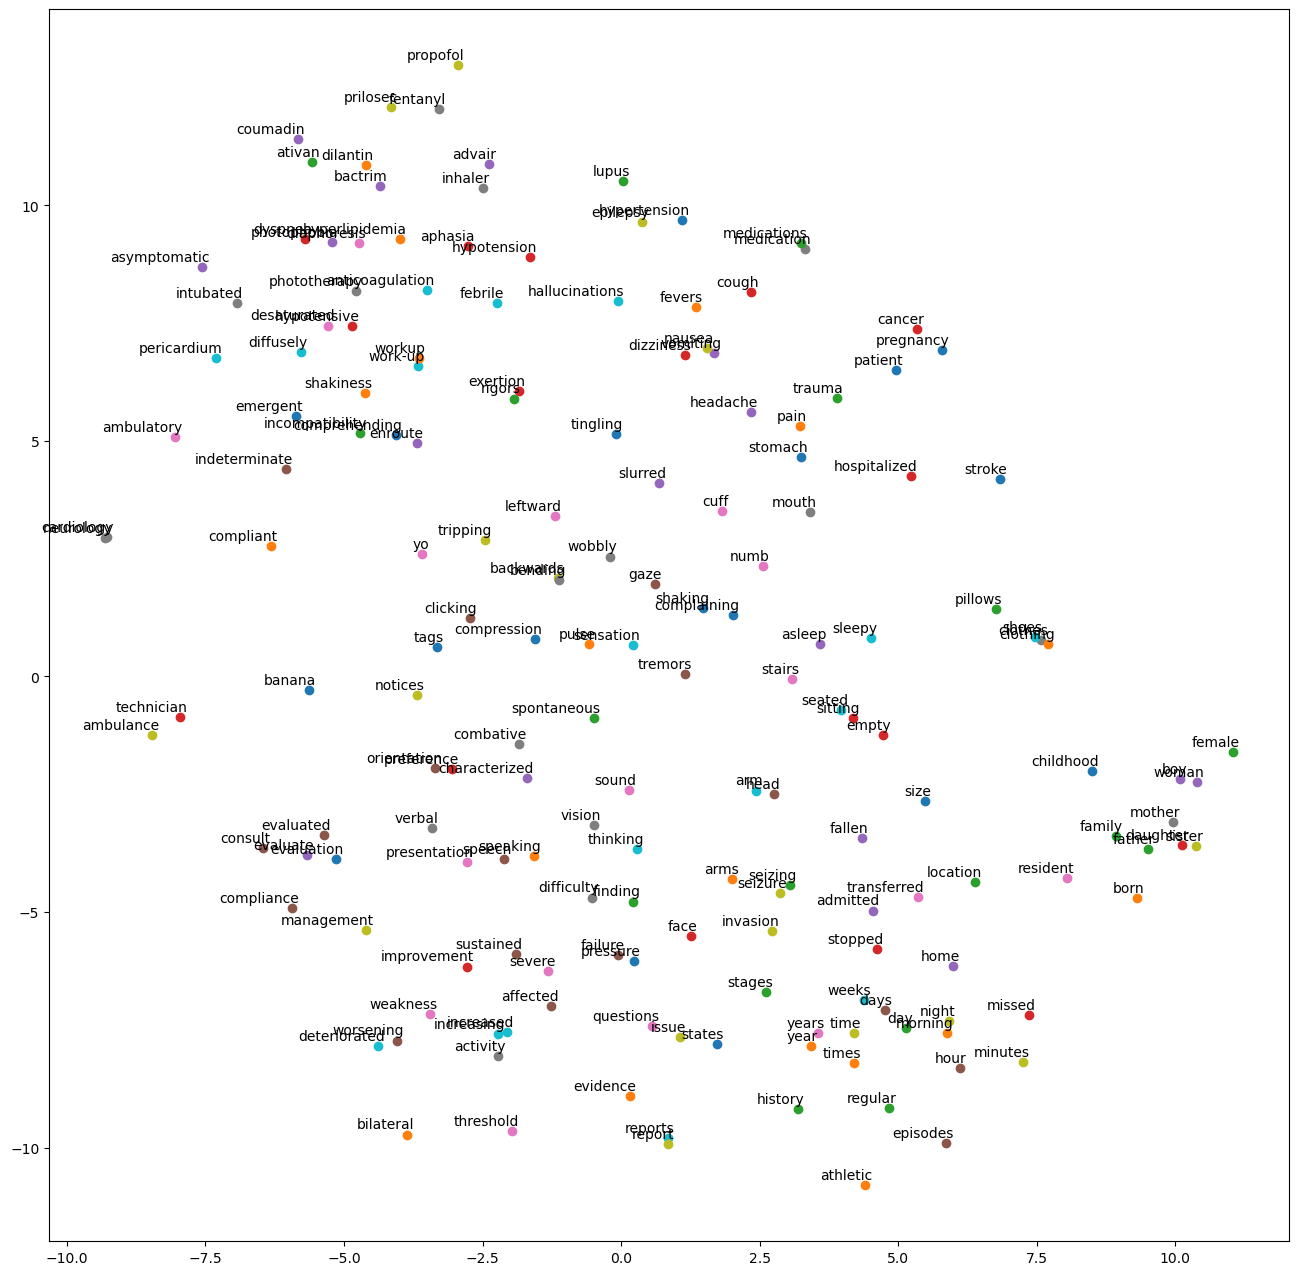

In [48]:
tsne_plot(pretrained_model,corpus_in_pretrained_model,True)

In [49]:
!wget -c "http://evexdb.org/pmresources/vec-space-models/PubMed-and-PMC-ri.tar.gz" # this will take some time, here we can try a small word2vec, which is not for medical.

--2025-02-17 19:14:02--  http://evexdb.org/pmresources/vec-space-models/PubMed-and-PMC-ri.tar.gz
Resolving evexdb.org (evexdb.org)... 130.232.253.13
Connecting to evexdb.org (evexdb.org)|130.232.253.13|:80... connected.
HTTP request sent, awaiting response... 502 Bad Gateway
2025-02-17 19:14:05 ERROR 502: Bad Gateway.



# Using SciSpacy

In [44]:
%pip install scispacy

  Using cached scispacy-0.5.5-py3-none-any.whl.metadata (18 kB)
  Using cached spacy-3.7.5-cp310-cp310-macosx_11_0_arm64.whl.metadata (27 kB)
  Using cached conllu-6.0.0-py3-none-any.whl.metadata (21 kB)
  Using cached pysbd-0.3.4-py3-none-any.whl.metadata (6.1 kB)
  Using cached nmslib-2.1.1.tar.gz (188 kB)
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.6.1-py2.py3-none-any.whl.metadata (8.7 kB)
  Using cached thinc-8.2.5-cp310-cp310-macosx_11_0_arm64.whl.metadata (15 kB)
Using cached scispacy-0.5.5-py3-none-any.whl (46 kB)
Using cached spacy-3.7.5-cp310-cp310-macosx_11_0_arm64.whl (6.6 MB)
Using cached conllu-6.0.0-py3-none-any.whl (16 kB)
Using cached pysbd-0.3.4-py3-none-any.whl (71 kB)
Using cached pybind11-2.6.1-py2.py3-none-any.whl (188 kB)
Using cached thinc-8.2.5-cp310-cp310-macosx_11_0_arm64.whl (779 kB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [170 lines of output]
      Depe

In [43]:
%pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_bc5cdr_md-0.4.0.tar.gz

  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_bc5cdr_md-0.4.0.tar.gz (125.1 MB)
  Preparing metadata (setup.py) ... done
  Using cached spacy-3.0.9-cp310-cp310-macosx_11_0_arm64.whl.metadata (17 kB)
  Using cached thinc-8.0.17-cp310-cp310-macosx_11_0_arm64.whl.metadata (14 kB)
Using cached spacy-3.0.9-cp310-cp310-macosx_11_0_arm64.whl (5.9 MB)
Using cached thinc-8.0.17-cp310-cp310-macosx_11_0_arm64.whl (584 kB)
  Attempting uninstall: thinc
    Found existing installation: thinc 8.2.5
    Uninstalling thinc-8.2.5:
      Successfully uninstalled thinc-8.2.5
  Attempting uninstall: spacy
    Found existing installation: spacy 3.7.5
    Uninstalling spacy-3.7.5:
      Successfully uninstalled spacy-3.7.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-sci-md 0.5.4 requires spacy<3.8.0,>=3.7.4, but you have spacy 3

In [ ]:
# import kagglehub

# Download latest version
# path = kagglehub.dataset_download("paultimothymooney/scispacy-pretrained-models")

# print("Path to dataset files:", path)

/Users/jefdewitt/miniconda3/envs/scispacy_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 987M/987M [00:25<00:00, 40.0MB/s] 

Extracting files...


Path to dataset files: /Users/jefdewitt/.cache/kagglehub/datasets/paultimothymooney/scispacy-pretrained-models/versions/1


In [45]:
# import spacy
# import thinc
# print(spacy.__version__)  # Should print a valid version
# print(thinc.__version__)   # Should print 8.2.5

import srsly
# print(srsly.__version__)  # Should be at least 2.4.3+



In [ ]:
# import spacy
# from spacy.tokens import Span
# from transformers import pipeline

# # Load Hugging Face model
# biomedical_ner = pipeline("ner", model="d4data/biomedical-ner-all", aggregation_strategy="simple")

# # Load a blank spaCy model
# nlp = spacy.blank("en")

# # Example text
# text = "Aspirin is used to treat pain and reduce fever or inflammation."

# # Get NER predictions
# results = biomedical_ner(text)

# # Convert Hugging Face output to spaCy format
# doc = nlp(text)
# ents = []

# for entity in results:
#     start, end = entity["start"], entity["end"]
#     label = entity["entity_group"]
    
#     # Create spaCy Span object only if char_span is valid
#     char_span = doc.char_span(start, end)
#     if char_span is not None:
#         span = Span(doc, char_span.start, char_span.end, label=label)
#         ents.append(span)

# # Assign the valid spans as entities
# doc.ents = ents

# # Visualize with spaCy's displacy
# spacy.displacy.render(doc, style="ent", jupyter=True)


/Users/jefdewitt/miniconda3/envs/new_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use mps:0
/Users/jefdewitt/miniconda3/envs/new_env/lib/python3.10/site-packages/torch/__init__.py:1236: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/tensor/python_tensor.cpp:436.)
  _C._set_default_tensor_type(t)


In [ ]:
# %pip install "spacy>=2.0.18,<3.0.0"

# import scispacy
# import spacy

# path_to_dataset_files = "/Users/jefdewitt/.cache/kagglehub/datasets/paultimothymooney/scispacy-pretrained-models/versions/1/Scispacy-Pretrained-Models/en_ner_bc5cdr_md-0.1.0/en_ner_bc5cdr_md"

# # path_to_dataset_files = "/Users/jefdewitt/.cache/kagglehub/datasets/paultimothymooney/scispacy-pretrained-models/versions/1/SciSpaCy-Pretrained-Models"

# print(path_to_dataset_files, "path_to_dataset_files")

# nlp = spacy.load(path_to_dataset_files)

In [5]:
# load headache notes
file_path = "./notes_headache.txt"

In [6]:
notes = []
with open(file_path, 'r') as fin:
  lines = fin.readlines()
  for line in lines:
    notes.append(line)
print(notes)
print(len(notes))

['50 year old female presents after having fallen in the bathtub 4 days ago and hitting the back of her head. Since then she has had a massive headache" which did not resolve with Tylenol. She states that she has a high threshold for pain and did not realize how bad it was during the day while at work but then when she got home at night she noticed it. The patient noticed ""silvery spects"" in her vision and she had trouble with some simple tasks like finding the tags on the back of her clothing in the morning. She reported that she had to check several times to make sure she did not put her clothes on backwards. She has had some dizziness, but no nausea or vomiting. Her speech has not been affected.\n', '23 F with h/o Lupus, ESRD not on HD (planned PD), labile hypertension, RUE VTE on anticoagulation, recent facial swelling who presents with hypertensive emergency. Patient developed severe frontal HA last evenening, a/w nausea. BP was not [**Location (un) 1131**] on home BP cuff. In t

In [7]:
df=notes

In [24]:
# Build corpus of all the entities extracted from the notes using spaCy model.
# The corpus is an array of arrays or list of lists where each of the nested lists corresponds to a note.

corpus=[]
for row in range(0, len(df)):
  str_tokens=[]
  tokens= nlp(df[row]).ents
  for i in range(0, len(tokens)):
    str_tokens.append(tokens[i].text)
  corpus.append(list(str_tokens))

print(corpus)
print(len(corpus))
print(corpus[0])

[['year', 'female', 'fallen', 'bathtub 4 days', 'head', 'massive headache', 'Tylenol', 'states', 'threshold', 'pain', 'day', 'home', 'night', 'patient', 'silvery spects', 'vision', 'finding', 'tags', 'clothing', 'morning', 'clothes', 'backwards', 'dizziness', 'vomiting', 'speech', 'affected'], ['F', 'h/o Lupus', 'ESRD', 'HD', 'planned PD', 'labile hypertension', 'RUE', 'anticoagulation', 'facial swelling', 'hypertensive emergency', 'Patient', 'frontal HA', 'a/w nausea', 'BP', 'Location', 'home BP', 'cuff', 'AM', 'HA', 'vomiting yellow/green liquid', 'BP', 'cuff', 'BP', 'Patient', 'VNA', 'Friday', 'BP', 'Patient', 'CP', 'shortness of breath', 'abd pain', 'facial swelling', 'weakness', 'dizziness', 'difficulty', 'speach', 'no numbness', 'tingling', 'compliant', 'medications', 'GU/GI complaints', 'UA', 'ED'], ['RH M', 'HTN', 'Afib', 'coumadin', 'CAD', 'PTCA', 'USOH', 'mild right-sided headache', 'a/w', 'photophobia', 'nausea', 'sitting', 'computer half', 'hour', 'L foot', 'numb', 'wobbly'

In [10]:
%pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [15]:
# import gensim

In [ ]:
!pip install spacy==3.7.5
!pip install scispacy
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_core_sci_md-0.5.4.tar.gz
# !pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_ner_craft_md-0.5.4.tar.gz
# !pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_ner_jnlpba_md-0.5.4.tar.gz
# !pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_ner_bc5cdr_md-0.5.4.tar.gz
# !pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_ner_bionlp13cg_md-0.5.4.tar.gz
# !pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_core_sci_lg-0.5.4.tar.gz
!pip install gensim
!pip install transformers

nlp = spacy.load("en_core_sci_md")

In [ ]:
# try:
#     nlp = spacy.load("en_core_sci_md")
#     doc = nlp("The patient was diagnosed with diabetes mellitus.")

#     for ent in doc.ents:
#         print(ent.text, ent.label_)
    
#     print("✅ Model is working correctly!")
# except Exception as e:
#     print("🚨 Error loading model:", e)

patient ENTITY
diagnosed ENTITY
diabetes mellitus ENTITY
✅ Model is working correctly!


In [25]:
import en_core_sci_md
from spacy import displacy

nlp = en_core_sci_md.load()
doc = []
for i in range(len(notes)):
  doc.append(nlp(notes[i]))
  displacy.render(doc, style="ent", jupyter=True)
  print("*******************************************************************************************************************************************")

*******************************************************************************************************************************************


*******************************************************************************************************************************************


*******************************************************************************************************************************************


*******************************************************************************************************************************************


*******************************************************************************************************************************************


*******************************************************************************************************************************************


*******************************************************************************************************************************************


*******************************************************************************************************************************************


*******************************************************************************************************************************************


*******************************************************************************************************************************************


*******************************************************************************************************************************************


In [26]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import re

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
print("corpus", corpus)

corpus [['year', 'female', 'fallen', 'bathtub 4 days', 'head', 'massive headache', 'Tylenol', 'states', 'threshold', 'pain', 'day', 'home', 'night', 'patient', 'silvery spects', 'vision', 'finding', 'tags', 'clothing', 'morning', 'clothes', 'backwards', 'dizziness', 'vomiting', 'speech', 'affected'], ['F', 'h/o Lupus', 'ESRD', 'HD', 'planned PD', 'labile hypertension', 'RUE', 'anticoagulation', 'facial swelling', 'hypertensive emergency', 'Patient', 'frontal HA', 'a/w nausea', 'BP', 'Location', 'home BP', 'cuff', 'AM', 'HA', 'vomiting yellow/green liquid', 'BP', 'cuff', 'BP', 'Patient', 'VNA', 'Friday', 'BP', 'Patient', 'CP', 'shortness of breath', 'abd pain', 'facial swelling', 'weakness', 'dizziness', 'difficulty', 'speach', 'no numbness', 'tingling', 'compliant', 'medications', 'GU/GI complaints', 'UA', 'ED'], ['RH M', 'HTN', 'Afib', 'coumadin', 'CAD', 'PTCA', 'USOH', 'mild right-sided headache', 'a/w', 'photophobia', 'nausea', 'sitting', 'computer half', 'hour', 'L foot', 'numb', '

In [28]:
model2 = word2vec.Word2Vec(corpus, min_count=1)

In [50]:
model2.wv['Tylenol']

array([-0.00476641,  0.00692343, -0.00710998, -0.00609479, -0.00504983,
        0.00634687, -0.00375642,  0.00790653,  0.00713383,  0.00770472,
        0.00191398,  0.00369026, -0.0003584 ,  0.00401229, -0.00643448,
        0.009891  , -0.00328591, -0.00947344,  0.00195278,  0.00682648,
        0.00103246,  0.00239429,  0.00943715,  0.00900247, -0.00464862,
        0.00830051,  0.00231604, -0.0082516 ,  0.00046795,  0.0019711 ,
        0.00883136, -0.00112187, -0.00681867, -0.00446385, -0.00760596,
       -0.00647371, -0.00110152, -0.00826262,  0.00940345, -0.00796621,
        0.00266245, -0.00055814, -0.00274415, -0.00538625, -0.00769939,
       -0.00626897,  0.00953656,  0.00507596,  0.00260511, -0.00929036,
       -0.00741965,  0.00881642, -0.00089472, -0.00447601,  0.00216447,
       -0.0097026 , -0.00174986, -0.00657175, -0.00445743,  0.00140168,
        0.00433023,  0.00559497, -0.00283657, -0.00071711,  0.00743247,
        0.00442774,  0.00146062,  0.00870868,  0.00721435,  0.00

In [51]:
import numpy as np

def tsne_plot(model, words):
    "Creates a t-SNE model and plots it"
    labels = []
    tokens = []

    for word in words:
        if word in model.wv:
            tokens.append(model.wv[word])
            labels.append(word)
        else:
            print(f"Skipping '{word}' as it is not present in the model's vocabulary.")

    tsne_model = TSNE(perplexity=11, early_exaggeration=12, n_components=2, init='pca', n_iter=1000, random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens))  # Convert tokens to a NumPy array

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/Users/jefdewitt/miniconda3/envs/new_env/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


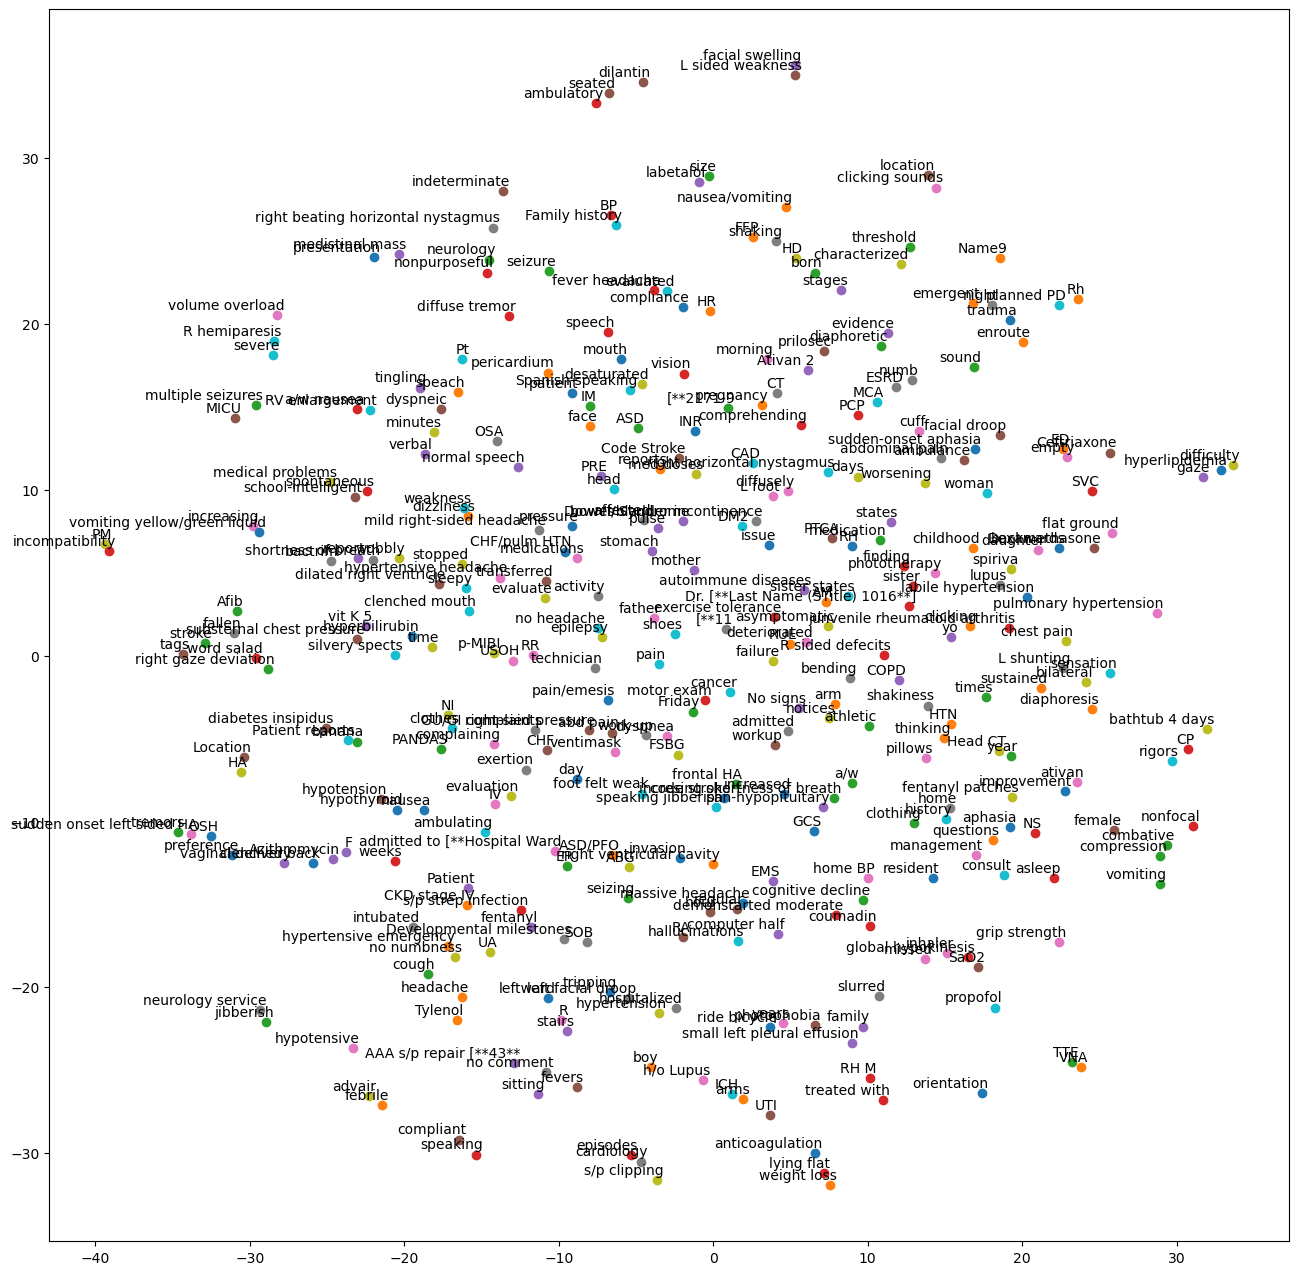

In [52]:
vocabs = model2.wv.index_to_key  # Access vocabulary using index_to_key
new_v = np.array(list(vocabs))
tsne_plot(model1, new_v)

In the above code snippet, a lot of words are skipped as the model was not trained. Hence a pretrained model will work better than the above model

In [53]:
# load pre-trained word2vec embeddings
import gensim
import gensim.downloader as api

info = api.info()  # show info about available models/datasets
pretrained_model= api.load("glove-wiki-gigaword-50")  # download the model and return as object ready for use


# model = gensim.models.KeyedVectors.load_word2vec_format('PubMed-and-PMC-ri.tar.gz', binary=True)

In [54]:
pretrained_model.most_similar("headache")

[('headaches', 0.8957464098930359),
 ('fatigue', 0.8547417521476746),
 ('pains', 0.8367806673049927),
 ('aches', 0.8088536262512207),
 ('nausea', 0.8022515177726746),
 ('discomfort', 0.7890003323554993),
 ('pain', 0.7766653895378113),
 ('anxiety', 0.7692657709121704),
 ('symptom', 0.7564830780029297),
 ('migraine', 0.7536172270774841)]

In [55]:
new_corpus_in_pretrained_model = []
for word in new_v:
    if word in pretrained_model.key_to_index:
        new_corpus_in_pretrained_model.append(word)
    else:
        print(word)  # Print out-of-vocabulary words


ED
BP
Patient
HTN
MICU
SOB
PM
right gaze deviation
treated with
EMS
RA
RR
abdominal pain
FSBG
Name9
PCP
PRE
CHF
facial swelling
Location
shortness of breath
CAD
pulmonary hypertension
Pt
HR
vit K 5
L sided weakness
left facial droop
Head CT
ICH
INR
FFP
IM
labetalol
sudden onset left sided HA
s/p clipping
RV enlargement
OSH
ASD
computer half
L foot
foot felt weak
R sided defecits
MCA
ASD/PFO
TTE
demonstarted moderate
dilated right ventricle
R
L shunting
p-MIBI
right ventricular cavity
global hypokinesis
right-sied pressure
[**11
ambulating
CHF/pulm HTN
exercise tolerance
dyspneic
flat ground
Dr. [**Last Name (STitle) 1016**]
admitted to [**Hospital Ward
ER
fever headache
F
h/o Lupus
ESRD
HD
planned PD
labile hypertension
RUE
pan-hypopituitary
Dexamethasone
bathtub 4 days
massive headache
Tylenol
Azithromycin
Ceftriaxone
ventimask
ABG
silvery spects
hypertensive emergency
a/w
RH M
GU/GI complaints
UA
R hemiparesis
speach
Afib
PTCA
USOH
mild right-sided headache
no numbness
Spanish-speaki

In [56]:
import numpy as np

def tsne_plot(model, words):
    "Creates a t-SNE model and plots it"
    labels = []
    tokens = []

    for word in words:
        if word in model:
            tokens.append(model[word])
            labels.append(word)
        else:
            print(f"Skipping '{word}' as it is not present in the model's vocabulary.")

    tsne_model = TSNE(perplexity=11, early_exaggeration=12, n_components=2, init='pca', n_iter=1000, random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens))  # Convert tokens to a NumPy array

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/Users/jefdewitt/miniconda3/envs/new_env/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


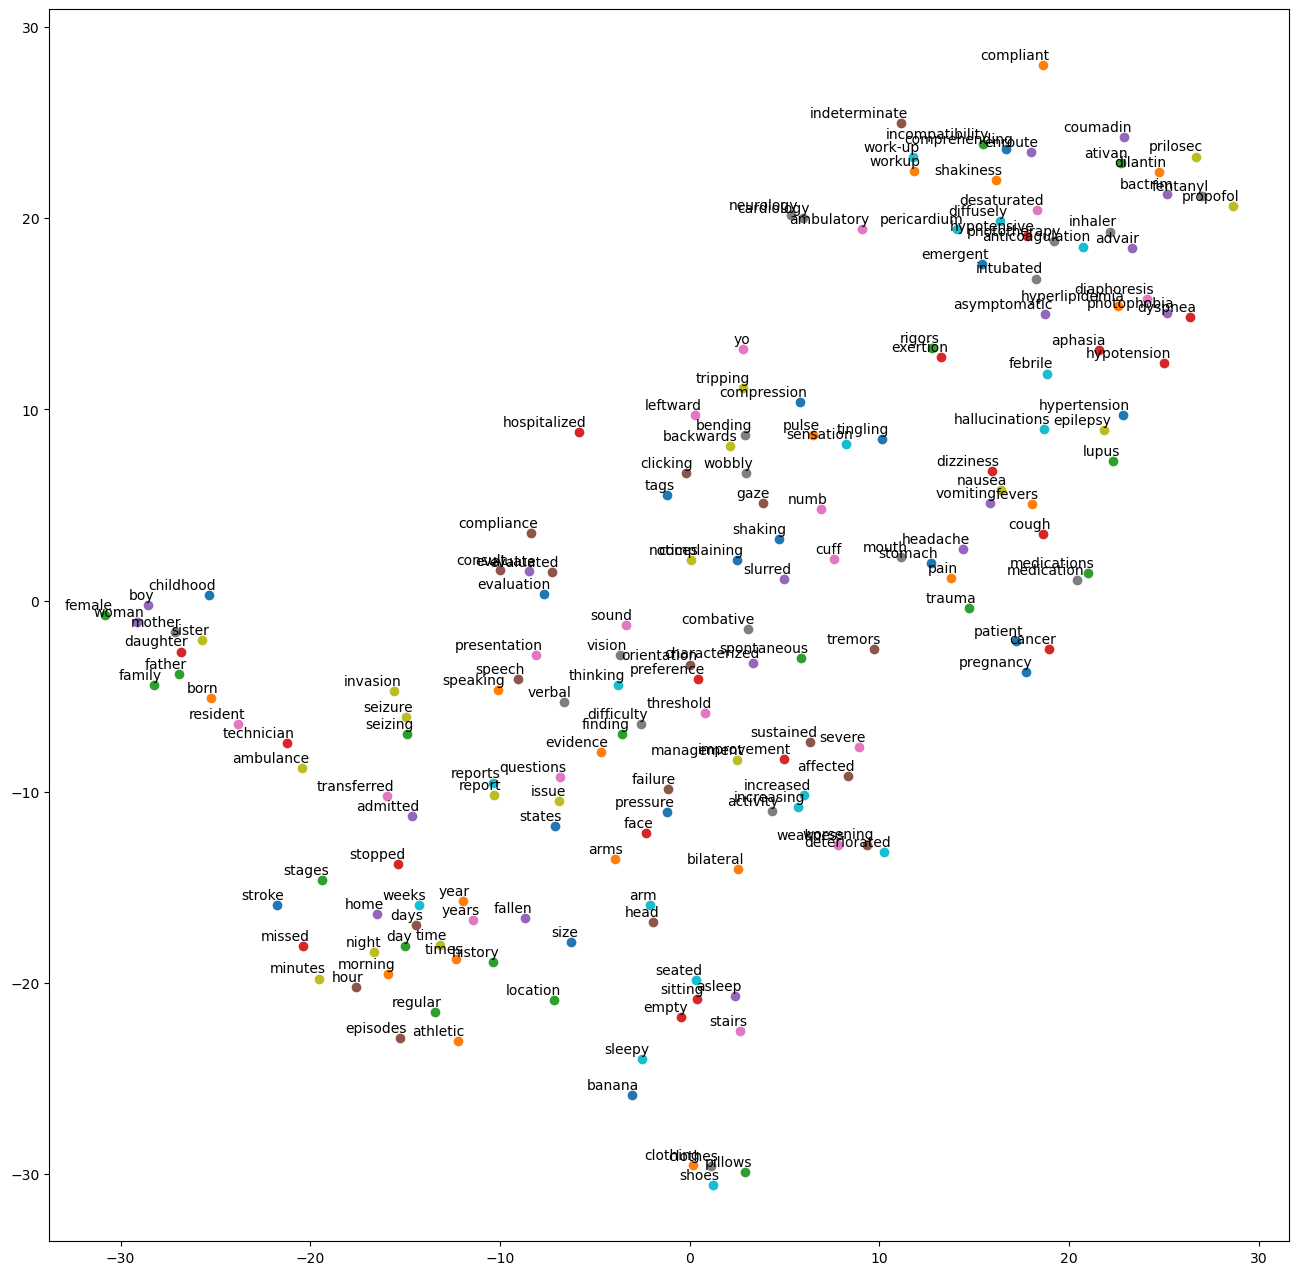

In [57]:
tsne_plot(pretrained_model,new_corpus_in_pretrained_model)